In [2]:
import numpy

import scipy
from scipy.spatial import distance_matrix

import matplotlib.pyplot as plt

# K-means

In [75]:
def split_nearest(x, centers):
    '''Split x to groups, the nearest center for each element of i-th group is centers[i]'''
    assert len(x.shape) == 2
    cl = distance_matrix(x, centers, p=2).argmin(axis=1)
    return [x[cl == i] for i in range(centers.shape[0])]

class k_means:
    def __init__(self, k):
        self.nclusters = k
        self.centers = None
        
    def train(self, x):
        # get random centers
        self.centers = x[numpy.random.default_rng(seed=numpy.random.randint(0, 2**32))
                .choice(x.shape[0], size=self.nclusters, replace=False)]
        prev = None
        while (prev != self.centers).all():
            cl = split_nearest(x, self.centers)
            # new centers are means of each group
            new = numpy.array([
                    x.mean(axis=0) if len(x) else self.centers[i]
                    for i, x in enumerate(cl)])
            self.centers, prev = new, self.centers
            
    def __call__(self, x):
        assert self.centers is not None
        return distance_matrix(x, self.centers, p=2).argmin(axis=1)

### testing

In [134]:
def gen1(N=100):
    st = numpy.array([1.5 + abs(numpy.random.randn(N)) * 3,
            numpy.random.randn(N)-3])
    st[1] /= st[0]
    x = numpy.concatenate([numpy.random.randn(N, 2)/3,
            2 + numpy.random.randn(N, 2)/3,
            st.T])
    return x

def gen2(N=100, std=1/3, r=1):
    alp = numpy.random.rand(N) * 2 * numpy.pi
    r = r + numpy.random.randn(N) * std
    x = numpy.array([r * numpy.cos(alp), r * numpy.sin(alp)]).T
    return x

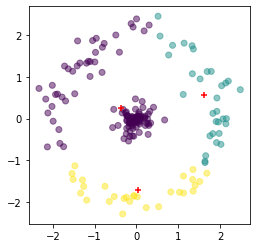

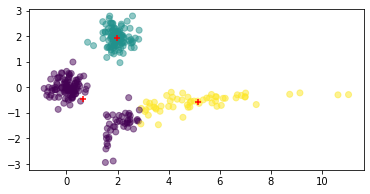

In [214]:
if 0:
    s = numpy.random.randint(0, 2**32-1)
    print(s)
    numpy.random.seed(s)
else:
    numpy.random.seed(3368459579)

kcl = k_means(3)
xx = [numpy.concatenate([gen2(100, 1/5, 2), gen2(100, 1/4, 0)]),
      gen1(100)]
for x in xx:
    kcl.train(x)
    plt.gca().set_aspect('equal', adjustable='box')
    plt.scatter(x[:, 0], x[:, 1], c=kcl(x), alpha=0.5)
    plt.scatter(kcl.centers[:, 0], kcl.centers[:, 1], c='red', marker='+')
    plt.show()

# MNIST experiment